### Imports und Weissemodell

In [43]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import qtb_plot

In [44]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

In [45]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);

In [55]:
qtb_plot.set("paper")

#### plotten von lambda

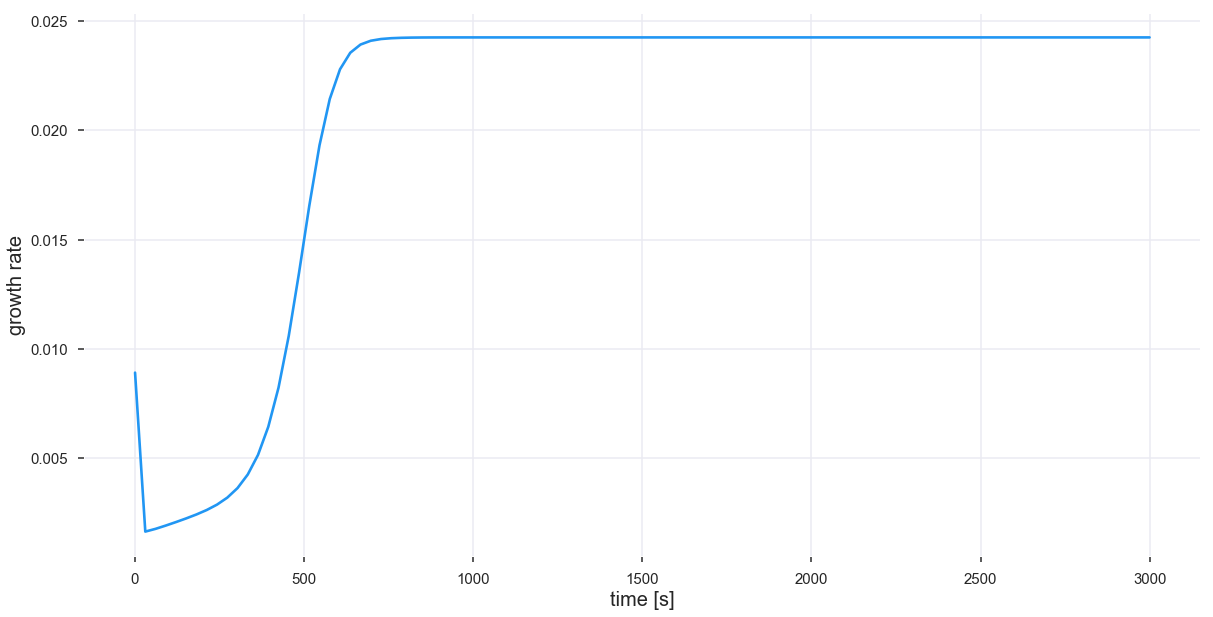

In [56]:
# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
#plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

#for i, data in enumerate(s.getT()):
plt.plot(s.getT(),s.getY()[:,16], label = 'pr') 

In [8]:
def Opt(p0):
    
    m = WeisseBaseModel()
    s = modelbase.Simulator(m)
    m.par.dm, m.par.Kgamma, m.par.vt,m.par.Kt, m.par.vm, m.par.Km, m.par.hq, m.par.kb, m.par.ku=p0
   
    #                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
    s.timeCourse(np.linspace(0,3000,100),weise_values);
    lambdanach = s.getY()[:,16][-1]
    lamda = 100 - lambdanach
    print(lamda)
    
    return (lamda)

In [9]:
#weise parameter
init_guess = [0.1,7,726,
              1000,5800,1000,
              4,1,1]
#nach 1.fit:
#init_guess = [1.00000000e-02, 1.00000000e+00, 1.00000000e+03, 
#              9.80109874e+02, 5.80000000e+03, 1.00000000e+03,
#              1.00000000e+01, 1.00000000e+01, 1.00000000e-02]


              
bounds = ((0.01,10),(1,100),(100,1000),
          (10,10000),(100,10000),(10,10000),
          (1,10),(0.01,10),(0.01,10))

In [ ]:
fit = spo.minimize(Opt, init_guess, bounds = bounds)

In [ ]:
fit

### überschreiben der Werte mit selbst gefunden Werten

In [41]:
mneu = WeisseBaseModel()

#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values_neu = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])



mneu.par.update({'Kgamma': 8000})
mneu.par.update({'vt':7000})
mneu.par.update({'wr':100})

mneu.par.update({'wq':100})

sneu = modelbase.Simulator(mneu)
sneu.timeCourse(np.linspace(0,3000,100),weise_values_neu);


Text(0, 0.5, 'groth rate')

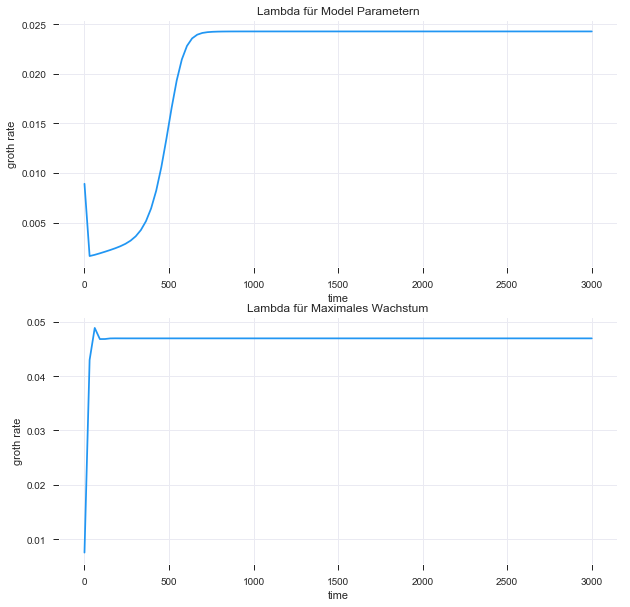

In [50]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getY()[:,16])
Plotlist[0].set_title('Lambda für Model Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('groth rate')


Plotlist[1].plot(sneu.getT(),sneu.getY()[:,16])
Plotlist[1].set_title('Lambda für Maximales Wachstum')#, size = 20)
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('groth rate')
